Identifying the Skills Relavent for Data Related Jobs (Data Analyst/Scientist/Engineer, Machine Learning Engineer
Using https://www.kaggle.com/datasets/asaniczka/data-science-job-postings-and-skills?resource=download

Skills Learnt: 
- Database Cleaning
- Data Explosion For Lists
- DataFrame Merge

In [23]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt

Data Merge

posting = pd.read_csv("job_postings.csv")
skills = pd.read_csv("job_skills.csv")
summary = pd.read_csv("job_summary.csv")

dp = posting.merge(skills, how="inner", on="job_link")
dp = dp.merge(summary, how="inner", on="job_link")

Data Cleaning

In [24]:
nodup = sqldf("""
SELECT DISTINCT(job_link)
FROM dp
WHERE job_location IS NULL OR job_skills IS NOT NULL
""")
new = sqldf("""
SELECT *
FROM nodup
LEFT JOIN dp
USING (job_link)""")

Top Skills for All

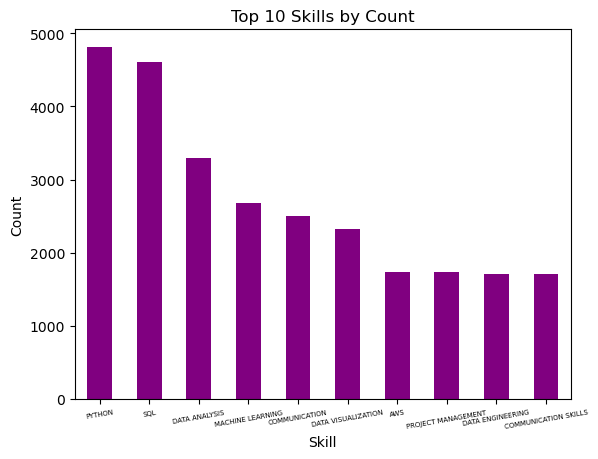

In [25]:
split = new["job_skills"].to_list()
skillsplit = skills["job_skills"].str.split(', ', expand = False)
me = skillsplit.to_frame()
mel = me.explode('job_skills')
melno = mel.value_counts()
mel = mel['job_skills'].str.upper()
melt = mel.value_counts()
melt.head(10).plot(kind='bar', color = "purple")
plt.xticks(rotation = 10, fontsize = 5)
plt.xlabel("Skill")
plt.ylabel("Count")
plt.title("Top 10 Skills by Count")
plt.show()

Top Skills for Jobs

In [ ]:
Data Scientist

In [26]:
new["job_title"] = new["job_title"].str.upper()
da = sqldf("""
SELECT *
FROM new
WHERE job_title LIKE '%DATA ANALYST%'
""")
dasplit = da["job_skills"].str.split(",", expand=False)
dame = dasplit.to_frame()
damel = dame.explode("job_skills")
dano = damel['job_skills'].str.upper()
danol = dano.value_counts()
print(danol.head(5))

job_skills
 SQL                   1043
 DATA VISUALIZATION     997
 PYTHON                 787
 TABLEAU                724
DATA ANALYSIS           698
Name: count, dtype: int64


In [ ]:
Data Scientist

In [27]:
ds = sqldf("""
SELECT *
FROM new
WHERE job_title LIKE '%DATA SCIENTIST%' OR job_title LIKE '%DATA SCIENTISTS%'
""")
dssplit = ds["job_skills"].str.split(",", expand=False)
dsme = dssplit.to_frame()
dsmel = dsme.explode("job_skills")
dsno = dsmel['job_skills'].str.upper()
dsnol = dsno.value_counts()
print(dsnol.head(5))

job_skills
 PYTHON              628
 MACHINE LEARNING    520
 SQL                 482
 R                   392
DATA SCIENCE         360
Name: count, dtype: int64


Data Engineer

In [28]:
de = sqldf("""
SELECT *
FROM new
WHERE job_title LIKE '%DATA ENGINEER%' OR job_title LIKE '%DATA ENGINEERS%'
""")
desplit = de["job_skills"].str.split(",", expand=False)
deme = desplit.to_frame()
demel = deme.explode("job_skills")
deno = demel['job_skills'].str.upper()
denol = deno.value_counts()
print(denol.head(5))

job_skills
PYTHON       1150
SQL          1057
SPARK         717
SNOWFLAKE     608
SCALA         603
Name: count, dtype: int64


Machine Learning Engineer

In [29]:
ml = sqldf("""
SELECT *
FROM new
WHERE job_title LIKE '%MACHINE LEARNING ENGINEER%' OR job_title LIKE '%ML ENGINEER%'
""")
mlsplit = ml["job_skills"].str.split(",", expand=False)
mlme = mlsplit.to_frame()
mlmel = mlme.explode("job_skills")
mlno = mlmel['job_skills'].str.upper()
mlnol = mlno.value_counts()
print(mlnol.head(5))

job_skills
 PYTHON             394
 TENSORFLOW         335
MACHINE LEARNING    311
 PYTORCH            267
 AWS                175
Name: count, dtype: int64


Business Analyst

In [30]:
ba = sqldf("""
SELECT *
FROM new
WHERE job_title LIKE '%BUSINESS ANALYST%' OR job_title LIKE '%BUSINESS ANALYSTS%'
""")
basplit = ba["job_skills"].str.split(",", expand=False)
bame = basplit.to_frame()
bamel = bame.explode("job_skills")
bano = bamel['job_skills'].str.upper()
banol = bano.value_counts()
print(banol.head(5))

job_skills
 DATA ANALYSIS         40
 SQL                   36
 COMMUNICATION         29
BUSINESS ANALYSIS      23
 PROJECT MANAGEMENT    22
Name: count, dtype: int64


Data Scientist